<a href="https://colab.research.google.com/gist/sai2043/aa273a17ce045f1382618aa0237a4fe3/monkey_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [8]:
!rm -rf drive/

In [1]:
!git clone https://github.com/fastai/fastbook 'drive/MyDrive/course-v4'

Cloning into 'drive/MyDrive/course-v4'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1992 (delta 9), reused 0 (delta 0), pack-reused 1973
Receiving objects: 100% (1992/1992), 73.65 MiB | 41.46 MiB/s, done.
Resolving deltas: 100% (1199/1199), done.


In [2]:
!pip install -q -r /content/drive/MyDrive/course-v4/requirements.txt

     |████████████████████████████████| 727kB 3.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 1.0MB 15.7MB/s 
     |████████████████████████████████| 194kB 23.4MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 40kB 6.0MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 2.6MB 20.1MB/s 


In [3]:
from utils import *
from fastbook import *
from fastai.vision.widgets import *


In [7]:
monkey_types = 'Rhesus','Japanese','Barbary'
path = Path('macaque')

In [9]:
if not path.exists():
    path.mkdir()
    for o in monkey_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)

In [10]:
!wget https://raw.githubusercontent.com/ostrolucky/Bulk-Bing-Image-downloader/master/bbid.py

--2020-10-20 17:12:54--  https://raw.githubusercontent.com/ostrolucky/Bulk-Bing-Image-downloader/master/bbid.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6346 (6.2K) [text/plain]
Saving to: ‘bbid.py’

bbid.py             100%[===================>]   6.20K  --.-KB/s    in 0s      

2020-10-20 17:12:55 (78.4 MB/s) - ‘bbid.py’ saved [6346/6346]



In [11]:
!python bbid.py -s "Rhesus macaque" -o 'macaque/Rhesus'
!python bbid.py -s "japanese macaque" -o 'macaque/japanes'
!python bbid.py -s "Barbary macaque" -o 'macaque/Barbary'

OK: 590l-macaque-rhesus-macaca-mulatta.jpg
OK: whoswho_oldworld1_900x1200.jpg
OK: izzle1_featured_1000x667.jpg
OK: maxresdefault.jpg
OK: Rhesus-macaque-information.jpg
FAIL: 30a.jpg
OK: rhesus-macaque_thumb.ngsversion.1486.JPG
OK: Rhesus_Macaque_Red_Fort_Agra.jpg
Invalid image, not saving 1200px-Rhesus_macaque_%28Macaca_mula.jpg
OK: Rhesus+Macaque.jpg
OK: Rhesus%20Monkey%20mother.JPG
OK: Macaca_mulatta_in_Guiyang.jpg
OK: portrait-of-rhesus-macaque-picture-i
OK: Goober-51587-786x1024.jpg
OK: 150709104721-rhesus-macaque-super-te.jpg
OK: 800px-rhesus_macaque_macaca_mulatta_.jpg
OK: Rhesus_macaque_Macaca_mulatta_215444.jpg
OK: Rhesus-Macaque-8572.jpg
OK: rhesus-macaque-126193.jpg
OK: rhesus-macaque-126242-Edit.jpg
OK: rhesus-macaque-126183-Edit.jpg
OK: Rhesus_Macaque%2C_Red_Fort%2C_Agra%2.jpg
OK: 1200px-Young_Rhesus_Macaque.jpg
OK: rhesusmacaque_web.jpg
OK: Rhesus+Macaque+2.jpg
OK: latest
OK: Rhesus-macaque-monkey-Florida.jpg
OK: rhesus-macaques.jpg
OK: rhesus-monkey.jpg
OK: CNPRCrhesusMal

In [12]:
fns = get_image_files(path)
fns

(#1659) [Path('macaque/Rhesus/rhesus-macaque-monkey-image-thailand.jpg'),Path('macaque/Rhesus/CNPRCrhesusFemalesInfants-K_West-201.jpg'),Path('macaque/Rhesus/portrait-rhesus-macaque-macaca-mulat-1.jpg'),Path('macaque/Rhesus/rhesus-macaque-robert-martinez.jpg'),Path('macaque/Rhesus/indian-rhesus-macaque.jpg'),Path('macaque/Rhesus/rhesus-macaque-126197.jpg'),Path('macaque/Rhesus/rhesus-macaques-3.jpg'),Path('macaque/Rhesus/rhesus+macaque.jpg'),Path('macaque/Rhesus/rhesus-macaque-drinking-water-800x53.jpg'),Path('macaque/Rhesus/1210-rhesus-monkey.jpg')...]

In [13]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
failed.map(Path.unlink);

In [15]:
monkey = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [16]:
dls = monkey.dataloaders(path)

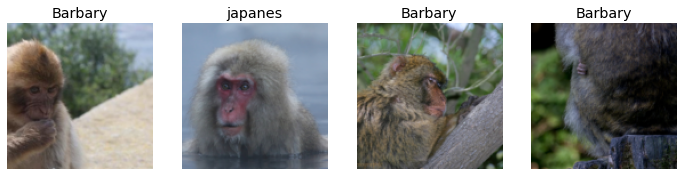

In [17]:
dls.valid.show_batch(max_n=4, nrows=1)

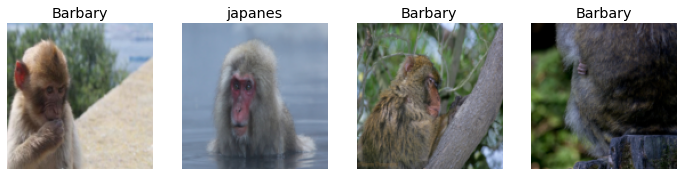

In [18]:
monkey = monkey.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = monkey.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

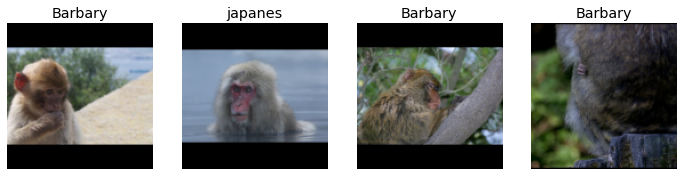

In [19]:
monkey = monkey.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = monkey.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

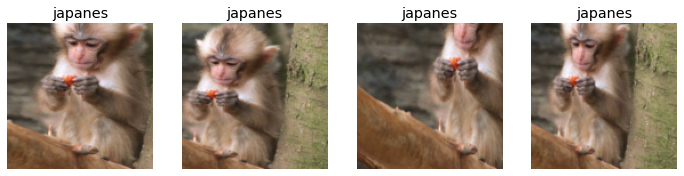

In [20]:
monkey = monkey.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = monkey.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

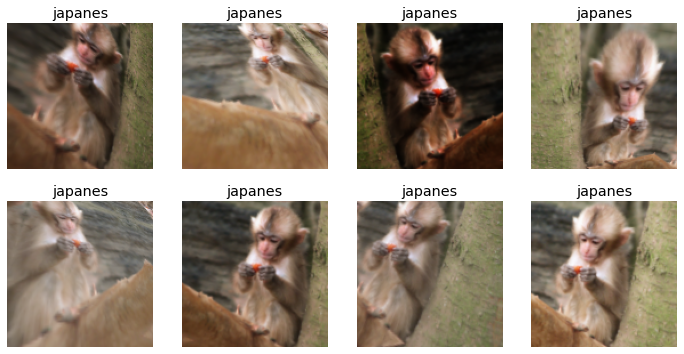

In [21]:
monkey = monkey.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = monkey.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [22]:
monkey = monkey.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = monkey.dataloaders(path)

In [23]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.323048,0.546992,0.169014,00:41


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.677877,0.440015,0.140845,00:41
1,0.552816,0.376749,0.118712,00:42
2,0.444896,0.343746,0.112676,00:42
3,0.366347,0.341715,0.106640,00:42


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


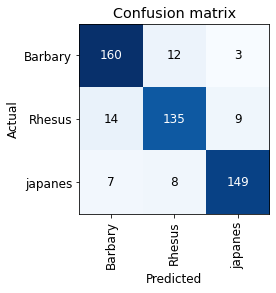

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

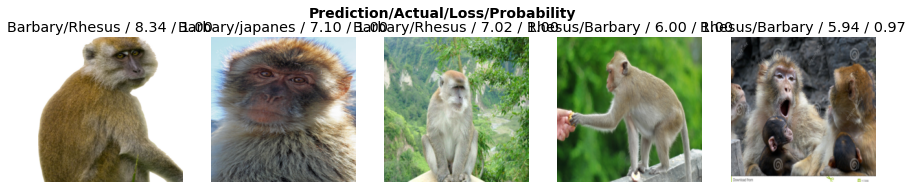

In [26]:
interp.plot_top_losses(5, nrows=1)

In [27]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [28]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Error: ignored

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [31]:
learn_inf = load_learner(path/'export.pkl')

In [37]:
learn_inf.predict('/content/macaque/Rhesus/1210-rhesus-monkey.jpg')

('Rhesus', tensor(1), tensor([5.1660e-05, 9.9878e-01, 1.1656e-03]))

In [38]:
learn_inf.dls.vocab

['Barbary', 'Rhesus', 'japanes']

### Creating a Notebook app from the model

In [39]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [42]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/macaque/Rhesus/1210-rhesus-monkey.jpg'])

In [43]:
img = PILImage.create(btn_upload.data[-1])

In [44]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [45]:
pred,pred_idx,probs = learn_inf.predict(img)

In [46]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Rhesus; Probability: 0.9988')

In [47]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [48]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [49]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [50]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])